In [11]:
import tensorflow as tf # import tensor flow 
import numpy as np
import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [12]:
 from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [13]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [14]:
print(train_labels[0])

1


In [15]:
max([max(sequence) for sequence in train_data])

9999

In [16]:
word_index = imdb.get_word_index() #1
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) #2
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])#3

1641221/1641221 [==============================] - 0s 0us/step


In [21]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))#1
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.#2
    return results
x_train = vectorize_sequences(train_data)#3
x_test = vectorize_sequences(test_data)#4

In [22]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [23]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [24]:
model = keras.Sequential([
  layers.Dense(16, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

In [25]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [27]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5046 - acc: 0.7967 - val_loss: 0.3770 - val_acc: 0.8735
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3055 - acc: 0.9001 - val_loss: 0.3171 - val_acc: 0.8799
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2271 - acc: 0.9257 - val_loss: 0.2787 - val_acc: 0.8912
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1774 - acc: 0.9439 - val_loss: 0.2721 - val_acc: 0.8919
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1482 - acc: 0.9526 - val_loss: 0.2788 - val_acc: 0.8897
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1176 - acc: 0.9656 - val_loss: 0.2999 - val_acc: 0.8818
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0969 - acc: 0.9705 - val_loss: 0.3100 - val_acc: 0.8855
Epoch 8/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0810 - acc: 0

In [28]:
history_dict = history.history

In [29]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

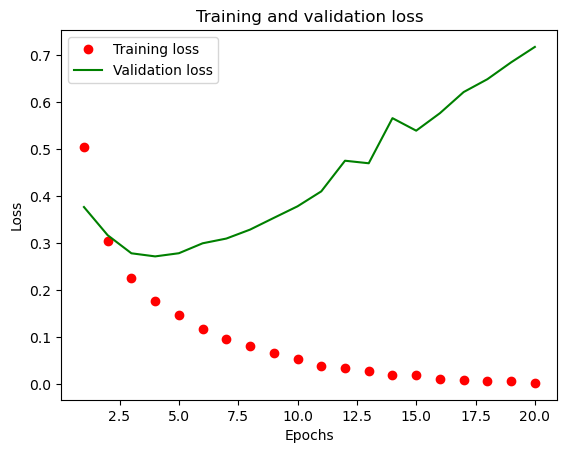

In [30]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

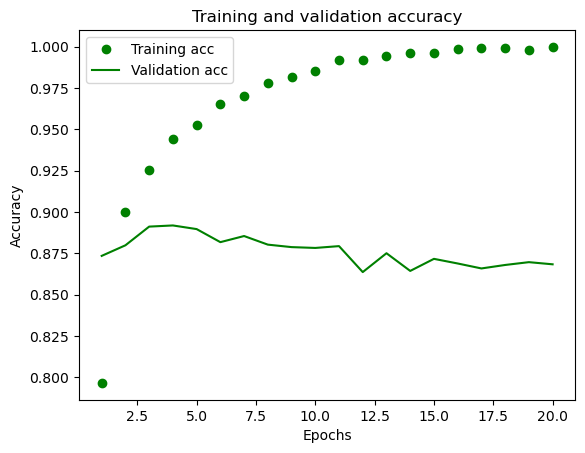

In [31]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4721 - accuracy: 0.8166
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2718 - accuracy: 0.9080
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2098 - accuracy: 0.9268
Epoch 4/4
782/782 [==============================] - 1s 900us/step - loss: 0.3082 - accuracy: 0.8772


In [37]:
results

[0.30824875831604004, 0.8772000074386597]

In [67]:
model = keras.Sequential([
  layers.Flatten(input_shape=(500,)),
  layers.Dense(16, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

In [68]:
# Get the predicted probabilities for the test set
y_pred = model.predict(x_test)

# Apply a threshold of 0.5 to convert probabilities to labels
y_pred_labels = ['positive' if p >= 0.5 else 'negative' for p in y_pred]

# Print the first 10 reviews and their predicted labels
for i in range(10):
    print('Review:\n', ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[i]]))
    print('True label:', 'positive' if y_test[i] else 'negative')
    print('Predicted label:', y_pred_labels[i])
    print()

782/782 [==============================] - 0s 367us/step
Review:
 ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss
True label: negative
Predicted label: positive

Review:
 ? this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances ? the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere ? with sexual tension and psychological ? it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes th

In [72]:
import pandas as pd

df = pd.DataFrame({'review': [' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[i]]) for i in range(len(y_pred_labels))],
                   'sentiment': ['positive' if y_test[i] else 'negative' for i in range(len(y_pred_labels))]})

df.to_csv('IMDB Dataset.csv', index=False)
